<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Uniform time sampling with Pyleoclim

## Preamble

A common issue in the paleosciences is the presence of uneven time spacing between consecutive observations. While `pyleoclim` includes several methods that can deal with this effectively, there are certain applications for which it is ncessary to place the records on a uniform time axis. In this tutorial you'll learn a few ways to do with `pyleoclim`.

### Goals:

* Become familiar with interpolation, binning, and Gaussian kernel coarsening in Pyleoclim

**Reading Time:**

10 minutes

### Keywords

Signal Processing; Visualization

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/ec_workshops_py/.

### Relevant Packages

LiPD; Matplotlib

## Data Description
Sea water $\delta^{18}O$ data from the MD98-2191 marine sediment record [(Stott et al., 2007)](https://www.science.org/doi/10.1126/science.1143791) stored as `MD982181.Khider.2014.lpd` in the data folder.

## Demonstration

Let's import the packages needed for this tutorial:

In [2]:
import pyleoclim as pyleo

### Step 1: Load the Series

To do so, we will first read the data from a LiPD file, load the appropriate variables, and visualize them. You can learn more about this step in the `working_with_LiPD.ipynb` tutorial.

In [3]:
D = pyleo.Lipd('../data/MD982181.Khider.2014.lpd')

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD982181.Khider.2014.lpd
14.23 MB :That's a big file! This may take a while to load...
Error: unable to read metadata file: module 'demjson' has no attribute 'decode_file'
Finished read: 1 record


In [5]:
d18Osw = D.to_LipdSeries()   #We know that the index of seawater d18O is 5

extracting paleoData...
extracting: dataSetName
extract: Exception: 'str' object has no attribute 'items'
extracting: lipdVersion
extract: Exception: 'float' object has no attribute 'items'
Created time series: 0 entries


Enter the number of the variable you wish to use:  5


IndexError: list index out of range

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='Age [yr BP]', ylabel='δ18osw [per mil]'>)

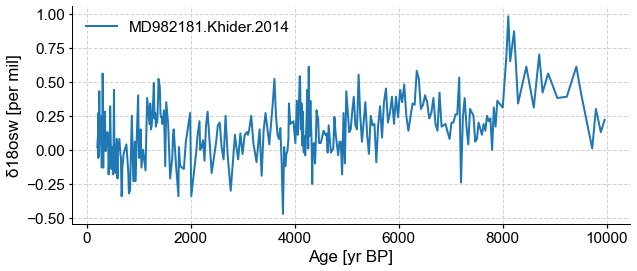

In [29]:
d18Osw.plot()

### Step 2: Interpolating

There a number of different reasons we might want to impute (assign new values to) our data. One is that the data is not evenly spaced and we require it to be in order to use some technique (say a [savitzky-golay filter](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.series.Series.filter)). First we should check whether this is necessary with the `.is_evenly_spaced()` method (this may already seem reasonably clear, but it never hurts to check):

In [30]:
d18Osw.is_evenly_spaced()

False

The data are not evenly spaced, as we suspected. Now there are a few different methods available in pyleoclim to place them on a uniform axis: interpolating, binning, and coarse graining via a Gaussian kernel as in [Rehfeld et al. (2011)](https://doi.org/10.5194/npg-18-389-2011). If you just wanted to evenly space the data, interpolation is probably the way to go. By default, this implements linear interpolation:

In [31]:
d18Osw_linear = d18Osw.interp()

In [33]:
#Checking whether or not the series is now evenly spaced
d18Osw_linear.is_evenly_spaced()

True

Success! Let's take a look at our handiwork.

<AxesSubplot:xlabel='Age [yr BP]', ylabel='δ18osw [per mil]'>

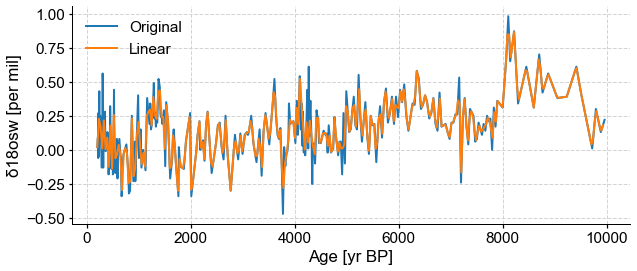

In [36]:
fig, ax = d18Osw.plot(label='Original')
d18Osw_linear.plot(ax=ax,label='Linear')

There are several different methods available for interpolation. These include `linear`, `nearest`, `zero`, `slinear`, `quadratic`, `cubic`, `previous`, `next`. More on these and their associated key word arguments can be found in the [documentation](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.series.Series.interp).

Let's compare a few of these methods just to see how they might differ:

In [52]:
d18Osw_quadratic=d18Osw.interp(method='quadratic')
d18Osw_next = d18Osw.interp(method='next')
d18Osw_zero = d18Osw.interp(method='zero')

<AxesSubplot:xlabel='Age [yr BP]', ylabel='δ18osw [per mil]'>

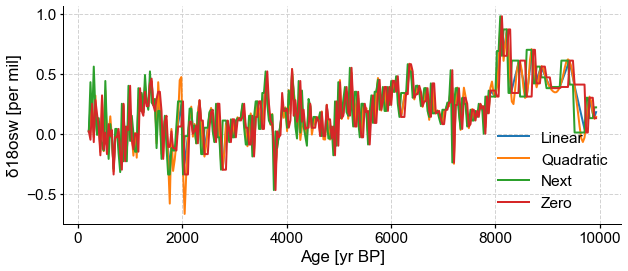

In [53]:
fig,ax = d18Osw_linear.plot(label='Linear')
d18Osw_quadratic.plot(ax=ax,label='Quadratic')
d18Osw_next.plot(ax=ax,label='Next')
d18Osw_zero.plot(ax=ax,label='Zero')

You can see how the methods can produce fairly different results. If we fiddled more with key word arguments the differences would be even more obvious. Play around a bit and read the documentation to find the best solution for you.

### Step 3: Binning

Instead of interpolating we could bin the series. The defaults for binning are inherently quite conservative, picking as bin size the coarsest time spacing present in the dataset, and averaging data over a uniform sequence of such intervals: 

In [37]:
d18Osw_bin = d18Osw.bin()

<AxesSubplot:xlabel='Age [yr BP]', ylabel='δ18osw [per mil]'>

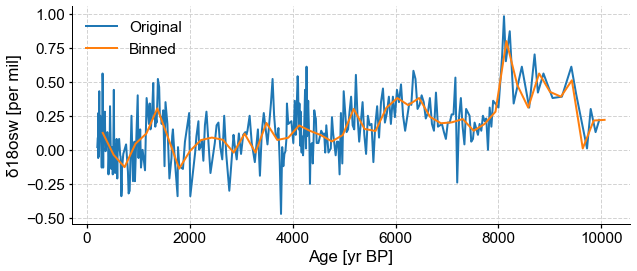

In [38]:
fig,ax = d18Osw.plot(label='Original')
d18Osw_bin.plot(ax=ax,label='Binned')

If we want this to be less conservative we can set the bin size using the `bin_size` key word argument, but that means the series is no longer guaranteed to be evenly spaced.

In [43]:
d18Osw_bin = d18Osw.bin(bin_size=80)

/Users/alexanderjames/Documents/GitHub/Pyleoclim_util/pyleoclim/utils/tsutils.py:136: UserWarning: The bin_size has been set, the series may not be evenly_spaced
  warnings.warn('The bin_size has been set, the series may not be evenly_spaced')


<AxesSubplot:xlabel='Age [yr BP]', ylabel='δ18osw [per mil]'>

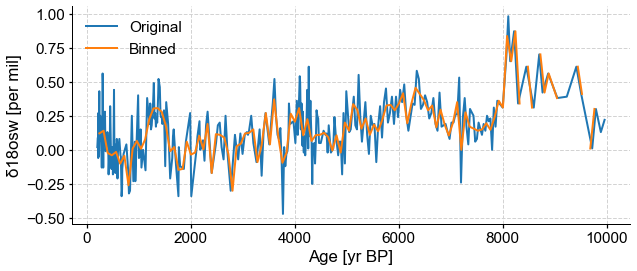

In [44]:
fig,ax = d18Osw.plot(label='Original')
d18Osw_bin.plot(ax=ax,label='Binned')

### Step 4: Coarsening with a Gaussian kernel

The last option is to coarsen the series using a Gaussian kernel via the `.gkernel()` method.

In [45]:
d18Osw_gk = d18Osw.gkernel()

/Users/alexanderjames/Documents/GitHub/Pyleoclim_util/pyleoclim/utils/tsutils.py:259: RuntimeWarning: invalid value encountered in double_scalars
  yc[i]  = sum(weight*yslice)/sum(weight)


<AxesSubplot:xlabel='Age [yr BP]', ylabel='δ18osw [per mil]'>

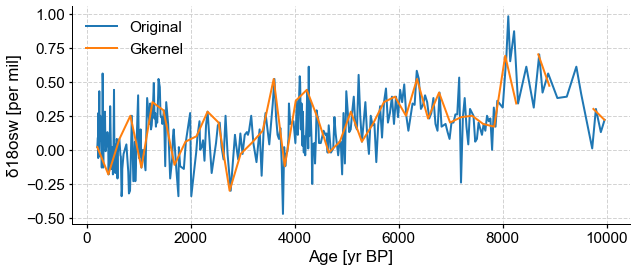

In [46]:
fig,ax = d18Osw.plot(label='Original')
d18Osw_gk.plot(ax=ax,label='Gkernel')

You may want to play with key word arguments `step_style` and the kernel bandwidth `h` a bit.

Each of these methods has its own key word arguments that can be adjusted to produce different results. The investigation of these arguments and how they effect the outcome of the imputation is left as an exercise for the reader.